## **Teste Cybersecurity Engineer**




**Objetivo**: Analisar dados de tráfego de rede, identificar riscos de segurança, desenvolver uma política de mitigação e implementar uma solução de filtragem de tráfego utilizando soluções inovadoras.

**Sumario:**

*   Análise Exploratória
*   Conclusões da Análise
*   Política de prevenção e mitigação de riscos
*   Implementação e Inovação





## **Analise Exploratória:**

Essa primeira amostragem tem como objetivo identificar quais informações os logs fornecem.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('test-dataset.csv')
display(df.head())

,ClientIP,ClientRequestHost,ClientRequestMethod,ClientRequestURI,EdgeStartTimestamp,ZoneName,ClientASN,ClientCountry,ClientDeviceType,ClientSrcPort,ClientRequestBytes,ClientRequestPath,ClientRequestReferer,ClientRequestScheme,ClientRequestUserAgent
0,51.208.59.112,porter.biz,GET,/media,2024-11-06 20:51:01+00:00,infinitepay.io,265432,in,mobile,5100,2805,/media,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...
1,37ba:82ba:e1ac:a46c:af71:5244:5a16:5b43,walters-thompson.com,GET,/respond/rock/such/reveal,2024-11-06 13:55:59+00:00,infinitepay.io,26599,in,mobile,59858,4757,/respond/rock/such/reveal,http://www.owens.com/,https,Opera/8.56.(X11; Linux x86_64; ak-GH) Presto/2...
2,c16f:f49a:cdf4:7c73:bb8c:be16:e521:84ea,porter.biz,GET,/pretty/condition/table,2024-11-06 23:16:30+00:00,infinitepay.io,268527,in,mobile,39510,2809,/pretty/condition/table,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...
3,181.162.159.214,porter.biz,GET,/seem,2024-11-06 11:31:41+00:00,infinitepay.io,271215,in,mobile,38344,2779,/seem,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...
4,116.254.36.200,acosta.com,GET,/thought/writer,2024-11-06 14:02:02+00:00,infinitepay.io,396982,us,desktop,40876,5589,/home,https://chavez-jones.com/,https,Mozilla/5.0 (iPad; CPU iPad OS 12_5_7 like Mac...


In [102]:
#primeira observação:
#a grande maioria das requisições que são apenas http vem de "hernandez.com"
user = [
   "159.73.67.187",  '6dea:f7b:c5f:514:1e0b:a2f2:43a0:4050','10.153.69.30'

]
dfprotocol = df[
    (df["ClientIP"].isin(user))
]

display(dfprotocol)

,ClientIP,ClientRequestHost,ClientRequestMethod,ClientRequestURI,ZoneName,ClientASN,ClientCountry,ClientDeviceType,ClientSrcPort,ClientRequestBytes,ClientRequestPath,ClientRequestReferer,ClientRequestScheme,ClientRequestUserAgent,is_filtered
2190,159.73.67.187,porter.biz,DELETE,/matter/they/meet,infinitepay.io,28186,in,tablet,32513,3700,/matter/they/meet,http://www.hernandez.com/,https,Mozilla/5.0 (iPhone; CPU iPhone OS 16_7_7 like...,0
6252,6dea:f7b:c5f:514:1e0b:a2f2:43a0:4050,porter.biz,DELETE,/upon/lot/left/sit,infinitepay.io,7738,in,tablet,33540,3738,/con/con,http://www.hernandez.com/,https,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,0
7054,10.153.69.30,walters-thompson.com,HEAD,/keep,infinitepay.io,16509,in,desktop,57116,4943,/services,http://www.hernandez.com/,https,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_9...,0


### Análise de IPs

O objetivo dessa sessão é ter uma compreensão básica do comportamento dos IPs

In [3]:
#para ter uma dimensão do número de IPs registrados, realizo uma contagem de valores únicos
print(df['ClientIP'].nunique())

18589


In [4]:
#Extraindo informações de média, máxima e mínima

frequencia_ips = df['ClientIP'].value_counts()
frequencias = pd.DataFrame(frequencia_ips).reset_index()
frequencias.columns = ['ClientIP', 'Frequency']

media = frequencias['Frequency'].mean()
max = frequencias['Frequency'].max()
min = frequencias['Frequency'].min()
desvio = frequencias['Frequency'].std()

print(f"Média: {media}")
print(f"max: {max}")
print(f"min: {min}")
print(f"desvio: {desvio}")

#De ínicio é possível observar a presença de outliers, já que houve um IP que realizou 156 requisições sendo que a média é de 1,61 requisições por IP.

Média: 1.613857657754586
max: 156
min: 1
desvio: 7.008787677308637


In [5]:
display(frequencia_ips.head(100))
#É possível observar que mais de 100 IPs tiveram frequencia de requisição acima de 50

,count
ClientIP,
53.153.77.110,156
208.150.99.181,119
125.227.246.131,116
185.24.37.122,115
209.158.28.49,114
...,...
190.212.52.36,66
35.96.80.127,66
20.186.223.8,66


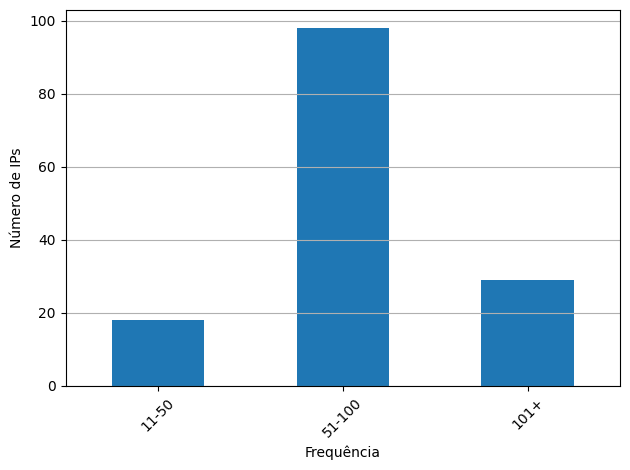

In [6]:
#Decidi gerar um gráfico para visualizar melhor a quantidade de IPs com alta frequência de requisições

frequencia_ips = df['ClientIP'].value_counts()


bins = [ 10, 50, 100, 200]
labels = [ '11-50', '51-100', '101+']
frequencia_categorias = pd.cut(frequencia_ips, bins=bins, labels=labels)
distribuicao = frequencia_categorias.value_counts().sort_index()

distribuicao.plot(kind='bar')
plt.xlabel('Frequência')
plt.ylabel('Número de IPs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Isolei a visualização apenas nos IPs com mais de 10 requisições
#Através do gráfico, pude notar que o número de IPs que fizeram mais de 10 requisições é muito baixo em comparação ao número total de IPs.
#A princípio, pode ser um indicativo de atividade suspeita, porém, é necessário analisar outras varíaveis antes de tirar uma conclusão.

### Analise de metodos de requisição

In [7]:
#inicío a contagem de requisições por método

metodos_frequentes = df['ClientRequestMethod'].value_counts()

display(metodos_frequentes)

#alto volume de requisições do tipo GET e POST até o momento pode não significar muito, baseado nas informações que temos até o momento.
#o numero alto de requisições tipo OPTIONS até o momento não significa muito, porém, caso não haja uma proteção, pode levar a exposição dos métodos PUT e DELETE.
#a requisição HEAD pode indicar uma tentativa de acesso aos recursos do servidor, mas não é possível confirmar no momento.

,count
ClientRequestMethod,
GET,24967
POST,4558
OPTIONS,385
PATCH,46
PUT,41
DELETE,2
HEAD,1


In [8]:
#realizo a contagem de user agents mais frequentes por tipo de requisição

user_agents_metodos = (df.groupby(['ClientRequestMethod', 'ClientRequestUserAgent']).size().reset_index(name='counts'))
top_user_agents_metodos = (user_agents_metodos.sort_values(['ClientRequestMethod', 'counts'], ascending=[True, False]).groupby('ClientRequestMethod').head(3).reset_index(drop=True))

display(top_user_agents_metodos)

#O alto numero de requisições tipo GET não é alarmante por sí só, porém, é possível notar user-agents que realizaram mais de mil requisições.
#Possível indicativo de atividade automatizada, já que é comum simular um user-agent para bypassar sistemas com bloqueio de automação.

#É possível identificar um user-agent com navegador desatualizado realizando requisições de tipo DELETE.
#Há possibilidade de que realmente seja um usuário autorizado usando navegador desatualizado, que por si só abre brechas de segurança.
#Outros métodos também apresentaram requisições com sistema operacional ou navegador desatualizados.

,ClientRequestMethod,ClientRequestUserAgent,counts
0,DELETE,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,1
1,DELETE,Mozilla/5.0 (iPhone; CPU iPhone OS 16_7_7 like...,1
2,GET,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,3734
3,GET,Mozilla/5.0 (Windows 98; mni-IN; rv:1.9.2.20) ...,2018
4,GET,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_12_...,1711
5,HEAD,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_9...,1
6,OPTIONS,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_6 like ...,82
7,OPTIONS,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,80
8,OPTIONS,Opera/9.21.(X11; Linux i686; gd-GB) Presto/2.9...,48
9,PATCH,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,10


### Investigação dos User-Agents

Após identificar padrões suspeitos nos user-agents, é necessário identificar a origem dos mesmos e analisar o comportamento

In [9]:
#inicío a investigação pelo user-agent com maior número de requisições.
#busco pelos IPs corresponde a esse user-agent.

user_suspeito = [
   "Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4.90) AppleWebKit/532.50.2 (KHTML, like Gecko) Version/4.0.3 Safari/532.50.2"
]
df_suspeitos = df[
    (df["ClientRequestUserAgent"].isin(user_suspeito))
]
df_suspeitos = df_suspeitos
df_suspeitos['ClientIP'].value_counts()

#identifico '159.168.200.38' como o IP com maior recorrência de requisições com esse User-Agent

,count
ClientIP,
159.168.200.38,29
185.24.37.122,27
159.197.110.50,25
221.112.50.103,25
26.158.117.152,24
...,...
133.221.199.226,1
196.174.220.45,1
198.31.210.176,1


In [99]:
#realizo uma busca pelos paths que esse IP está tentando acessar

user = [
   "125.227.246.131"

]
df_suspeitos = df[
    (df["ClientIP"].isin(user))
]

display(df_suspeitos['ClientRequestPath'].unique())

#Através dos paths, podemos constatar que se trata de atividade maliciosa.
#É possível observar tentativas de exploração de XSS, SQL injection, acesso a recursos confidenciais do servidor e tentativa de login com perfil.

array(['/capital/travel/represent/skill', '/president', '/might',
       '/watch/Congress', '/investment/discussion/simple',
       '/green/church/place', '/maintain/free/large', '/page',
       '/vulnerable.php?search=<svg onload=alert(1)>',
       '/api/v1/users?search=; DROP TABLE users;--', '/view/require',
       '/our/agent/with', '/painting/gas/film', '/settings', '/dashboard',
       '/wait', '/user/profile', '/register', '/contact', '/.git/config',
       '/reset-password?email=%27%20OR%201=1--', '/set/fill', '/beat/add',
       '/enough', '/products', '/research/partner/she', '/street',
       '/total/system', "/<iframe src='javascript:alert(1)'></iframe>",
       '/../../../../../../../../../../etc/shadow',
       '/certainly/enjoy/me/player', '/../../../etc/passwd',
       '/serious/she/drive', '/idea/many/rule/hold', '/authority',
       '/about', '/NUL', '/write/toward/story', '/through/public',
       '/want/think/event', '/whom/ever/box/nothing',
       "/<meta http-equ

In [11]:
#outro comportamento suspeito é o numero alto de user_agents associado a esse IP
display(df_suspeitos['ClientRequestUserAgent'].nunique())

41

In [12]:
#em relação as operações criticas como DELETE:

metodo = ["DELETE"]
Ips_delete = df[
    (df["ClientRequestMethod"].isin(metodo))
]

display(Ips_delete)


#Os User_Agents não condizem com os dispositivos

,ClientIP,ClientRequestHost,ClientRequestMethod,ClientRequestURI,EdgeStartTimestamp,ZoneName,ClientASN,ClientCountry,ClientDeviceType,ClientSrcPort,ClientRequestBytes,ClientRequestPath,ClientRequestReferer,ClientRequestScheme,ClientRequestUserAgent
2190,159.73.67.187,porter.biz,DELETE,/matter/they/meet,2024-11-05 03:35:34+00:00,infinitepay.io,28186,in,tablet,32513,3700,/matter/they/meet,http://www.hernandez.com/,https,Mozilla/5.0 (iPhone; CPU iPhone OS 16_7_7 like...
6252,6dea:f7b:c5f:514:1e0b:a2f2:43a0:4050,porter.biz,DELETE,/upon/lot/left/sit,2024-11-14 21:20:06+00:00,infinitepay.io,7738,in,tablet,33540,3738,/con/con,http://www.hernandez.com/,https,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...


### Identificação de IPs suspeitos

Ips que tentaram realizar XSS

In [13]:
#implemento um regex para identificar quais são os IPs que tentaram inserir tags no path
suspicious_paths = df[df['ClientRequestPath'].str.contains(
    r'<[^>]+>', case=False, regex=True)]

lista_XSS = suspicious_paths['ClientIP'].unique()


Ips que tentaram realizar SQL Injection

In [ ]:
sql_injection = r"(?:\b(SELECT|INSERT|UPDATE|DELETE|DROP|UNION|WHERE|;|--|#|\"|'|`)\b|--|/\*|\*/|;|OR|AND|\\b)".lower()
suspeitos_sql = df[df['ClientRequestPath'].str.contains(sql_injection, case=False, regex=True)]
lista_sql_injection = suspeitos_sql['ClientIP'].unique()

Ips com alto volume de Bytes por requisição

In [15]:
#identificando a média e desvio padrão de bytes por requisição para estipular um limite
mean_bytes = df['ClientRequestBytes'].mean()
std_bytes = df['ClientRequestBytes'].std()
limite = mean_bytes + 2 * std_bytes
print(f"média: {mean_bytes}")
print(f"desvio: {std_bytes}")
print(f"limite: {limite}")
#limite de 44474 bytes estipulado por requisição

média: 5333.6797
desvio: 19570.28478154361
limite: 44474.24926308722


In [16]:
ips_acima_do_limite = df[df['ClientRequestBytes'] > limite]['ClientIP'].unique()
lista_ddos = ips_acima_do_limite.tolist()

Ips que realizaram tentativas comuns de path traversal

In [ ]:
padrao_pathtraversal = r'(\.\.\/|\.\.\\|%2e%2e|%2e%2f|%2e%2e%2f|%2e%2e%5c|\/\.\.\/|\\\.\.\\)'

# Filtrando paths que possuem tentativas de path traversal
ips_pathtraversal = df[df['ClientRequestPath'].str.contains(padrao_pathtraversal, regex=True)]
lista_pathtraversal = ips_pathtraversal['ClientIP'].unique()

Ips que possuem requisições com muitos User_agents

In [18]:
user_agent_counts = df.groupby('ClientIP')['ClientRequestUserAgent'].nunique().reset_index()
limit = 5
lista_evasion = user_agent_counts[user_agent_counts['ClientRequestUserAgent'] > limit]

Ips que realizaram requisições repetidas em curto intervalo de tempo

In [19]:
df['EdgeStartTimestamp'] = pd.to_datetime(df['EdgeStartTimestamp'])
df_sorted = df.sort_values(by=['ClientIP', 'EdgeStartTimestamp'])
df_sorted['TimeDiff'] = df_sorted.groupby('ClientIP')['EdgeStartTimestamp'].diff().dt.total_seconds()
intervalo = 5
lista_bot = df_sorted[df_sorted['TimeDiff'] <= intervalo]['ClientIP'].unique()


Amostragem dos dados sem os iniciais IPs suspeitos

In [33]:
# Garantindo que todas as listas de IPs suspeitos sejam arrays unidimensionais de strings
lista_ddos = np.array(lista_ddos).astype(str).flatten()
lista_XSS = np.array(lista_XSS).astype(str).flatten()
lista_sql_injection = np.array(lista_sql_injection).astype(str).flatten()
lista_pathtraversal = np.array(lista_pathtraversal).astype(str).flatten()
lista_bot = np.array(lista_bot).astype(str).flatten()
lista_evasion = np.array(lista_evasion).astype(str).flatten()


# Concatenando todas as listas em uma lista única de IPs suspeitos
suspeitos = np.unique(np.concatenate([
    lista_ddos,
    lista_XSS,
    lista_sql_injection,
    lista_pathtraversal,
    lista_bot,
    lista_evasion,

]))

# Filtrando o DataFrame para excluir os IPs suspeitos
dflimpo = df[~df['ClientIP'].isin(suspeitos)]

# Exibindo o DataFrame limpo
display(dflimpo)


,ClientIP,ClientRequestHost,ClientRequestMethod,ClientRequestURI,ZoneName,ClientASN,ClientCountry,ClientDeviceType,ClientSrcPort,ClientRequestBytes,ClientRequestPath,ClientRequestReferer,ClientRequestScheme,ClientRequestUserAgent,is_filtered
0,51.208.59.112,porter.biz,GET,/media,infinitepay.io,265432,in,mobile,5100,2805,/media,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...,0
1,37ba:82ba:e1ac:a46c:af71:5244:5a16:5b43,walters-thompson.com,GET,/respond/rock/such/reveal,infinitepay.io,26599,in,mobile,59858,4757,/respond/rock/such/reveal,http://www.owens.com/,https,Opera/8.56.(X11; Linux x86_64; ak-GH) Presto/2...,0
2,c16f:f49a:cdf4:7c73:bb8c:be16:e521:84ea,porter.biz,GET,/pretty/condition/table,infinitepay.io,268527,in,mobile,39510,2809,/pretty/condition/table,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...,0
3,181.162.159.214,porter.biz,GET,/seem,infinitepay.io,271215,in,mobile,38344,2779,/seem,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...,0
5,46.16.90.85,lopez.info,GET,/exactly/main/assume,infinitepay.io,14061,us,desktop,5574,996,/exactly/main/assume,http://www.hernandez.com/,http,Mozilla/5.0 (compatible; MSIE 9.0; Windows 95;...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,42.143.155.128,porter.biz,GET,/piece/statement/common/Mrs,infinitepay.io,26615,in,desktop,64982,4088,/piece/statement/common/Mrs,http://www.hernandez.com/,https,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,0
29996,50.97.88.31,porter.biz,GET,/piece/statement/common/Mrs,infinitepay.io,264160,in,desktop,60088,3470,/login,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_1 like M...,0
29997,167.156.227.203,porter.biz,GET,/piece/statement/common/Mrs,infinitepay.io,262785,in,desktop,61337,4083,/piece/statement/common/Mrs,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_1 like M...,0
29998,151.104.73.27,porter.biz,GET,/piece/statement/common/Mrs,infinitepay.io,26599,in,desktop,55579,4108,/settings,http://www.gonzalez-garcia.net/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_1 like M...,0


In [34]:
#com o dataset filtrado, é possível notar que:
#a contagem dos IPs mais frequentes por método esta dentro da média e desvio

user_metodos = (dflimpo.groupby(['ClientRequestMethod', 'ClientIP']).size().reset_index(name='counts'))
top_user_metodos = (user_metodos.sort_values(['ClientRequestMethod', 'counts'], ascending=[True, False]).groupby('ClientRequestMethod').head(10).reset_index(drop=True))

display(top_user_metodos)


,ClientRequestMethod,ClientIP,counts
0,DELETE,159.73.67.187,1
1,DELETE,6dea:f7b:c5f:514:1e0b:a2f2:43a0:4050,1
2,GET,205.248.208.46,5
3,GET,25.195.20.94,4
4,GET,6f80:fc31:9b10:8779:bffb:42d1:abf:540,4
5,GET,135.130.83.6,3
6,GET,188.171.224.41,3
7,GET,196.136.28.168,3
8,GET,197.225.62.134,3
9,GET,107.47.81.85,2


In [35]:
#em relação as operações criticas como DELETE:

metodo = ["DELETE"]
Ips_delete = dflimpo[
    (dflimpo["ClientRequestMethod"].isin(metodo))
]

display(Ips_delete)


#Os User_Agents não condizem com os dispositivos

,ClientIP,ClientRequestHost,ClientRequestMethod,ClientRequestURI,ZoneName,ClientASN,ClientCountry,ClientDeviceType,ClientSrcPort,ClientRequestBytes,ClientRequestPath,ClientRequestReferer,ClientRequestScheme,ClientRequestUserAgent,is_filtered
2190,159.73.67.187,porter.biz,DELETE,/matter/they/meet,infinitepay.io,28186,in,tablet,32513,3700,/matter/they/meet,http://www.hernandez.com/,https,Mozilla/5.0 (iPhone; CPU iPhone OS 16_7_7 like...,0
6252,6dea:f7b:c5f:514:1e0b:a2f2:43a0:4050,porter.biz,DELETE,/upon/lot/left/sit,infinitepay.io,7738,in,tablet,33540,3738,/con/con,http://www.hernandez.com/,https,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,0


In [60]:
#um mapa básico de agents coerentes com o dispositivo
device_ua_map = {
    'desktop': ['Windows', 'Linux', 'Macintosh', 'Chrome OS'],
    'mobile': ['Android', 'iPhone', 'Mobile', 'Windows Phone'],
    'tablet': ['iPad', 'Tablet', 'Android'],
}
def is_device_type_matching(row):
    user_agent = row['ClientRequestUserAgent']
    device_type = row['ClientDeviceType']
    expected_ua_keywords = device_ua_map.get(device_type, [])
    return any(keyword in user_agent for keyword in expected_ua_keywords)

lista_fake_users = dflimpo[~dflimpo['ValidDevice']]['ClientIP'].unique()


print(len(lista_fake_users))
#Observamos que cerca de 10 mil requisições foram feitas com dispositivos incondizentes ocom user_agent
#Apesar da possibilidade de ser um mascaramento, por si só pode não representar comportamento malicioso.

9156


In [61]:
#criando um dataframe somente com os IPs excluídos para fins de comparação
df_common_aligned, dflimpo_common_aligned = df_common.align(dflimpo_common, join='left', axis=0, fill_value=None)
df_diff = df_common_aligned.loc[(df_common_aligned != dflimpo_common_aligned).any(axis=1)]
display(df_diff)



,ClientIP,ClientRequestHost,ClientRequestMethod,ClientRequestURI,ZoneName,ClientASN,ClientCountry,ClientDeviceType,ClientSrcPort,ClientRequestBytes,ClientRequestPath,ClientRequestReferer,ClientRequestScheme,ClientRequestUserAgent,is_filtered
4,116.254.36.200,acosta.com,GET,/thought/writer,infinitepay.io,396982,us,desktop,40876,5589,/home,https://chavez-jones.com/,https,Mozilla/5.0 (iPad; CPU iPad OS 12_5_7 like Mac...,0
9,192.88.206.163,acosta.com,GET,/in/evening/unit/defense,infinitepay.io,396982,us,desktop,49518,6491,/in/evening/unit/defense,http://www.hernandez.com/,https,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,0
10,118.20.187.50,pearson.com,POST,/read/change/animal/war,infinitepay.io,396982,us,desktop,39024,617288,/read/change/animal/war,http://www.hernandez.com/,https,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,0
12,147.229.206.97,porter.biz,GET,/color/save/interest,infinitepay.io,26615,in,tablet,47696,3917,/color/save/interest,http://www.hernandez.com/,https,Mozilla/5.0 (Windows 98; mni-IN; rv:1.9.2.20) ...,0
17,163.242.39.161,porter.biz,PATCH,/loss,infinitepay.io,14840,in,desktop,5075,3279,/<img src='x' onerror='alert(1)'>,http://www.hernandez.com/,https,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29862,2cea:a7ce:5ca7:c6b:b11d:539c:acca:69ef,porter.biz,GET,/piece/statement/common/Mrs,infinitepay.io,26599,in,tablet,40278,3459,/script.php?=<script>window.location='http://e...,http://www.hernandez.com/,https,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,0
29868,96.39.138.241,porter.biz,GET,/piece/statement/common/Mrs,infinitepay.io,270623,in,desktop,49764,4084,/index.php?id=' OR '1'='1,http://www.hernandez.com/,https,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,0
29883,46.161.163.180,porter.biz,GET,/piece/statement/common/Mrs,infinitepay.io,269416,in,desktop,58538,4083,/vulnerable.php?search=<svg onload=alert(1)>,http://www.hernandez.com/,https,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,0
29969,69.58.203.32,porter.biz,GET,/piece/statement/common/Mrs,infinitepay.io,4230,in,desktop,32090,4079,/login.jsp?user=admin'--,http://www.hernandez.com/,https,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_1 like M...,0


In [53]:
#valores mais frequentes das requisições tidas como suspeitas
for column in df_diff.columns:

    top_values = df_diff[column].value_counts().head(3)


    print(f"Coluna '{column}':")
    for value, count in top_values.items():
        print(f"  Valor = '{value}', Ocorrências = {count}")
    print()


Coluna 'ClientIP':
  Valor = '53.153.77.110', Ocorrências = 156
  Valor = '208.150.99.181', Ocorrências = 119
  Valor = '125.227.246.131', Ocorrências = 116

Coluna 'ClientRequestHost':
  Valor = 'acosta.com', Ocorrências = 4761
  Valor = 'porter.biz', Ocorrências = 2323
  Valor = 'brown.net', Ocorrências = 2054

Coluna 'ClientRequestMethod':
  Valor = 'GET', Ocorrências = 11874
  Valor = 'POST', Ocorrências = 1724
  Valor = 'OPTIONS', Ocorrências = 167

Coluna 'ClientRequestURI':
  Valor = '/want/think/event', Ocorrências = 1563
  Valor = '/want/media/street', Ocorrências = 973
  Valor = '/authority', Ocorrências = 646

Coluna 'ZoneName':
  Valor = 'infinitepay.io', Ocorrências = 13825

Coluna 'ClientASN':
  Valor = '396982', Ocorrências = 10602
  Valor = '267309', Ocorrências = 249
  Valor = '28573', Ocorrências = 186

Coluna 'ClientCountry':
  Valor = 'us', Ocorrências = 10780
  Valor = 'in', Ocorrências = 3015
  Valor = 'jp', Ocorrências = 10

Coluna 'ClientDeviceType':
  Valor = '

In [62]:
#valores mais frequentes das requisições tidas como normais
for column in dflimpo.columns:

    top_values = dflimpo[column].value_counts().head(3)


    print(f"Coluna '{column}':")
    for value, count in top_values.items():
        print(f"  Valor = '{value}', Ocorrências = {count}")
    print()

Coluna 'ClientIP':
  Valor = '205.248.208.46', Ocorrências = 8
  Valor = '172.126.210.5', Ocorrências = 7
  Valor = '128.40.28.16', Ocorrências = 7

Coluna 'ClientRequestHost':
  Valor = 'porter.biz', Ocorrências = 10909
  Valor = 'joseph.org', Ocorrências = 2078
  Valor = 'walters-thompson.com', Ocorrências = 975

Coluna 'ClientRequestMethod':
  Valor = 'GET', Ocorrências = 13093
  Valor = 'POST', Ocorrências = 2834
  Valor = 'OPTIONS', Ocorrências = 218

Coluna 'ClientRequestURI':
  Valor = '/want/think/event', Ocorrências = 1381
  Valor = '/want/media/street', Ocorrências = 831
  Valor = '/sound/explain/suggest', Ocorrências = 687

Coluna 'ZoneName':
  Valor = 'infinitepay.io', Ocorrências = 16175

Coluna 'ClientASN':
  Valor = '26599', Ocorrências = 1192
  Valor = '28573', Ocorrências = 1154
  Valor = '26615', Ocorrências = 1055

Coluna 'ClientCountry':
  Valor = 'in', Ocorrências = 15357
  Valor = 'us', Ocorrências = 701
  Valor = 'br', Ocorrências = 31

Coluna 'ClientDeviceType':

In [82]:
#calculando médias de frequencia entre os ips maliciosos e comuns
frequencia_ips_diff =df_diff['ClientIP'].value_counts()
frequencias_diff = pd.DataFrame(frequencia_ips_diff).reset_index()
frequencias_diff.columns = ['ClientIP', 'Frequency']

media = frequencias['Frequency'].mean()
max = frequencias['Frequency'].max()
min = frequencias['Frequency'].min()
desvio = frequencias['Frequency'].std()
total_requisicoes = df_diff['ClientIP'].count()
print(total_requisicoes)
print(f"Média: {media}")
print(f"max: {max}")
print(f"min: {min}")
print(f"desvio: {desvio}")
print(df_diff['ClientIP'].nunique())

#Nota-se que o número de requisições de IPs maliciosos é 13825,
#porém, concentra-se num número relativamente muito baixo de IPs (2685)

13825
Média: 5.148975791433892
max: 156
min: 1
desvio: 18.039268410887235
2685


In [83]:
dflimpo['ClientIP'].value_counts()

media = frequencias_client_ip.mean()
desvio = frequencias_client_ip.std()
min = frequencias_client_ip.min()
max = frequencias_client_ip.max()
total_requisicoes = dflimpo['ClientIP'].count()
print(total_requisicoes)
print(f"Média: {media}")
print(f"max: {max}")
print(f"min: {min}")
print(f"desvio: {desvio}")
print(dflimpo['ClientIP'].nunique())

#é possível notar que apesar do alto número de requisições consideradas comuns (16175),
#as requisições estão distribuídas em um numero muito próximo de IPs (15904)

16175
Média: 1.0170397384305836
max: 8
min: 1
desvio: 0.17125035019716803
15904


## **Conclusões da Análise**

Após análises podemos concluir que:

1.    Há uma relação direta entre o volume de requisições por IP e a possibilidade de atividade maliciosa, já que, apesar do número maior de requisições no grupo de IPs comuns, dentre as requisições realizadas por IPs suspeitos, a quantidade de IPs é muito menor, o que indica que poucos IPs realizaram uma quantidade massiva de requisições.

2.   A grande maioria das tentativas de ataque vem dos Estados Unidos, e praticamente todos compartilham do mesmo ASN 396982, o que pode indicar um potencial centro de atividade maliciosa.

3. Os hosts acosta.com e brown.net possuem recorrência muito grande de requisições por IPs maliciosos e pouquíssima recorrência dentre os usuários comuns, indicando que são pontos focais de ataques.

4. Muitas requisições foram realizadas de navegadores ou sistemas operacionais antigos e muitas vezes em dispositivos incongruentes, tudo indica a possibilidade de atividade automatizada e tentativa de evasão por meio de simulação de usuário com user agents falsos. Outro forte indício de comportamento automatizado vem do alto volume de requisições em um curto período de tempo.

5. As análises revelaram que hernandez.com é o maior redirecionador, tanto para requisições HTTP quanto HTTPS, indicando sua significativa influência no tráfego de rede. Essa predominância sugere uma possível correlação com atividades maliciosas, já que metade do seu tráfego provém de IPs maliciosos.

6. Número muito alto de requisições com métodos não convencionais como OPTIONS, PATCH, PUT com IPs diferentes, indicando possível ataque coordenado. Além disso, requisições isoladas de DELETE e HEAD com IPs de aparição única, podem ser sinal de uma tentativa "hit and run" de testar o servidor.




## **Política de prevenção e mitigação de riscos**


**Objetivo**
Estabelecer diretrizes para monitorar, prevenir e mitigar ataques cibernéticos e comportamentos suspeitos baseados nas análises realizadas sobre o tráfego de rede. Esta política visa proteger a integridade dos sistemas e dados da empresa, identificar atividades suspeitas e coordenar respostas eficazes para possíveis ameaças.

1. Controle e Monitoramento de Volume de Requisições por IP
Limite de Requisições: Implementar uma limitação de requisições para IPs individuais. Qualquer IP que exceda o limite definido em um período de tempo será temporariamente bloqueado, e o comportamento será registrado para futuras investigações.
Alertas de Anomalias: Configurar alertas em tempo real para identificar picos de requisições de um único IP. Esses alertas serão revisados pela equipe de segurança para determinar a legitimidade do tráfego.
2. Bloqueio e Filtragem de ASN Suspeitos
Lista de Bloqueio ASN: Identificar ASNs com histórico de atividade maliciosa, especialmente aqueles provenientes dos Estados Unidos, como o ASN 396982. Esses ASNs devem ser incluídos em uma lista de controle de tráfego e bloqueados, a menos que tenham uma necessidade justificada de acesso.
Monitoramento Geolocalizado: Aumentar o monitoramento e inspeção do tráfego proveniente dos Estados Unidos, especialmente de regiões conhecidas por alta atividade maliciosa.
3. Restrições para Hosts de Destino Suspeitos
Bloqueio de Hosts Maliciosos: Implementar listas de bloqueio para os hosts com alta recorrência de acessos suspeitos, como acosta.com e brown.net. O tráfego para esses destinos será redirecionado para um sistema de quarentena para análise antes de ser permitido.
Whitelist de Hosts Confiáveis: Criar uma lista de hosts confiáveis e alertar a equipe de segurança sobre tentativas de acessar hosts fora dessa lista.
4. Detecção e Bloqueio de User-Agents Incompatíveis
Filtro de User-Agent: Bloquear requisições feitas a partir de user-agents que indiquem navegadores ou sistemas operacionais obsoletos, incomuns ou inconsistentes. Monitorar solicitações provenientes de dispositivos incompatíveis para possível bloqueio.
Análise de Comportamento Automatizado: Implementar detecção de comportamento automatizado, como volume anormal de requisições em períodos de tempo curtos. Esses eventos deverão ser sinalizados e bloqueados caso sejam confirmados como tentativas de automação maliciosa.
5. Monitoramento e Controle de Redirecionamentos
Filtragem para Redirecionamentos em Hernandez.com: Adicionar o domínio hernandez.com à lista de controle de tráfego (TCL), monitorando todo o acesso para este destino. O redirecionamento para este domínio será bloqueado se for considerado suspeito e alertas serão gerados caso metade ou mais do tráfego esteja indo para esse domínio.
6. Controle Rígido de Métodos de Requisição
Restrição de Métodos Incomuns: Bloquear ou monitorar rigorosamente métodos de requisição menos comuns, como OPTIONS, PATCH e PUT. Qualquer aumento repentino nesses métodos indicará uma possível tentativa de ataque.
Bloqueio Imediato para DELETE e HEAD Suspeitos: Requisições DELETE e HEAD que venham de IPs únicos (ou "hit and run") serão bloqueadas automaticamente. Análise posterior será realizada para identificar padrões e determinar se são sondagens maliciosas.
7. Revisão Contínua e Atualizações de Políticas
Monitoramento Contínuo: A equipe de segurança deve revisar regularmente os padrões de tráfego para ajustar as configurações de limite, listas de bloqueio e outras políticas com base em tendências emergentes.
Relatório e Feedback: Relatórios de incidentes devem ser compilados e revisados mensalmente para identificar áreas de ajuste e para treinar os sistemas de inteligência artificial e machine learning, permitindo uma adaptação dinâmica das regras de bloqueio e mitigação.
8. Ferramentas e Automação
Implementação de WAF: Configurar um Web Application Firewall (WAF) que aplique as regras desta política, bloqueando requisições suspeitas e coletando dados para análise posterior.
Automação com IA: Integrar sistemas de IA para análise de logs em tempo real e identificação de padrões suspeitos, agindo como um monitor proativo para detectar e responder a ameaças potenciais.

**Conclusão**
Esta política orienta a empresa na detecção e mitigação de riscos de segurança cibernética, protegendo os sistemas contra ameaças baseadas em comportamento anômalo e acesso a recursos críticos. Ela será revisada trimestralmente e ajustada conforme novas ameaças e padrões são identificados.

## **implementação e inovação**

**Objetivo**:
implementar as etapas descritas na política e incrementar recursos que possam aprimorar sua eficácia de forma inovadora.

**Explicação do script**:
Nesta etapa, decidi unir a implementação e a inovação, incorporando o uso de inteligência artificial em todo o processo de análise de logs. O script acessa um arquivo dinâmico de logs e, a cada 10 novas linhas, envia as últimas ocorrências para a API da OpenAI. A API processa os logs, os armazena em um DataFrame, identifica atividades suspeitas com base nas informações dos logs mais recentes e armazena em um banco de dados SQLite uma blacklist com os IPs, hosts e ASNs maliciosos. A vantagem dessa implementação, é que a IA é capaz de lidar com qualquer padrão de logs e gerar insights que passariam batido por olhos humanos.




In [ ]:
import openai
import pandas as pd
import time
import sqlite3
from collections import deque


openai.api_key = 'chave_api'


df_logs = pd.DataFrame(columns=[
    "source_ip", "protocol", "host", "port", "path", "timestamp",
    "packet_size", "status", "location", "user_agent"
])

conn = sqlite3.connect('blacklist.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS blacklist (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    type TEXT NOT NULL,
    value TEXT NOT NULL UNIQUE
)
''')
conn.commit()

log_queue = deque(maxlen=1000)

def update_blacklist(suspect_ips, suspect_hosts, suspect_asns):
    for ip in suspect_ips:
        try:
            cursor.execute("INSERT OR IGNORE INTO blacklist (type, value) VALUES (?, ?)", ("IP", ip))
        except sqlite3.Error as e:
            print(f"Erro ao inserir IP na blacklist: {e}")

    for host in suspect_hosts:
        try:
            cursor.execute("INSERT OR IGNORE INTO blacklist (type, value) VALUES (?, ?)", ("Host", host))
        except sqlite3.Error as e:
            print(f"Erro ao inserir Host na blacklist: {e}")

    for asn in suspect_asns:
        try:
            cursor.execute("INSERT OR IGNORE INTO blacklist (type, value) VALUES (?, ?)", ("ASN", asn))
        except sqlite3.Error as e:
            print(f"Erro ao inserir ASN na blacklist: {e}")
    conn.commit()

def analyze_behavior(log_set, size):
    try:
        log_content = "\n".join([str(log) for log in log_set])
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "user", "content": f"Analise os seguintes {size} logs para detectar atividades suspeitas, como IPs repetidos, ASN específico (396982), hosts suspeitos (acosta.com, brown.net), requisições incomuns (OPTIONS, PATCH, PUT), e user-agents falsificados. Retorne IPs, hosts e ASNs suspeitos que devem ser adicionados à blacklist:\n\n{log_content}"}
            ],
            max_tokens=1500
        )
        result = response['choices'][0]['message']['content']

        suspect_data = eval(result)
        suspect_ips = suspect_data.get("suspect_ips", [])
        suspect_hosts = suspect_data.get("suspect_hosts", [])
        suspect_asns = suspect_data.get("suspect_asns", [])

        update_blacklist(suspect_ips, suspect_hosts, suspect_asns)

    except Exception as e:
        print(f"Erro ao chamar a API: {e}")


def analyze_log_line(log_line):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "user", "content": f"Organize as informações desta linha de log em um DataFrame com as colunas: source_ip, protocol, host, port, path, timestamp, packet_size, status, location, user_agent:\n\n{log_line}"}
            ],
            max_tokens=100
        )
        result = response['choices'][0]['message']['content']
        row_data = eval(result)
        return row_data
    except Exception as e:
        print(f"Erro ao chamar a API: {e}")
        return None

def tail_and_process_logs(file_path):
    global df_logs
    with open(file_path, "r") as file:
        file.seek(0, 2)
        log_count = 0

        while True:
            try:
                line = file.readline()
                if not line:
                    time.sleep(0.5)
                    continue
                processed_data = analyze_log_line(line)
                if processed_data:
                    df_logs.loc[len(df_logs)] = processed_data
                    log_queue.append(processed_data)
                    log_count += 1

                    if log_count % 10 == 0:
                        analyze_behavior(list(log_queue)[-10:], 10)
                    if log_count >= 1000 and log_count % 10 == 0:
                        analyze_behavior(list(log_queue), 1000)

                    print(f"Processados {log_count} logs")

            except Exception as e:
                print(f"Erro ao processar logs: {e}")
                time.sleep(5)


log_file_path = 'arquivo.log'

while True:
    try:
        tail_and_process_logs(log_file_path)
    except Exception as e:
        print(f"Erro no monitoramento do arquivo de log: {e}")
        time.sleep(10)